In [0]:
from pyspark.sql import functions as f
from pyspark.sql.functions import UserDefinedFunction
from datetime import date, datetime, timedelta
from pyspark.sql.types import *
from pyspark.sql.functions import col
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import col, sum as spark_sum
from pyspark.sql.functions import col, count
from pyspark.sql.functions import udf, col
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix


In [0]:
from pyspark.sql import SparkSession
APP_NAME = "COVID19 Data Analysis"
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
file_folder = "/FileStore/tables/"
DF = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').load(file_folder + 'Covid_Data.csv')
DF.show()

+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE| DATE_DIED|INTUBED|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|ICU|
+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|    2|           1|  1|           1|03/05/2020|     97|        1| 65|       2|       2|   2|     2|      2|           1|            2|             2|      2|            2|      2|                   3| 97|
|    2|           1|  2|           1|03/06/2020|     97|        1| 72|      97|       2|   2|     2|      2|           1|            2|             2|      1|            1|    

In [0]:
DF.printSchema()

root
 |-- USMER: integer (nullable = true)
 |-- MEDICAL_UNIT: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- PATIENT_TYPE: integer (nullable = true)
 |-- DATE_DIED: string (nullable = true)
 |-- INTUBED: integer (nullable = true)
 |-- PNEUMONIA: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PREGNANT: integer (nullable = true)
 |-- DIABETES: integer (nullable = true)
 |-- COPD: integer (nullable = true)
 |-- ASTHMA: integer (nullable = true)
 |-- INMSUPR: integer (nullable = true)
 |-- HIPERTENSION: integer (nullable = true)
 |-- OTHER_DISEASE: integer (nullable = true)
 |-- CARDIOVASCULAR: integer (nullable = true)
 |-- OBESITY: integer (nullable = true)
 |-- RENAL_CHRONIC: integer (nullable = true)
 |-- TOBACCO: integer (nullable = true)
 |-- CLASIFFICATION_FINAL: integer (nullable = true)
 |-- ICU: integer (nullable = true)



In [0]:
# Describe the DataFrame
description = DF.describe()

# Show the descriptive statistics
description.show()


+-------+-------------------+------------------+-------------------+-------------------+----------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+-----------------+
|summary|              USMER|      MEDICAL_UNIT|                SEX|       PATIENT_TYPE| DATE_DIED|          INTUBED|         PNEUMONIA|               AGE|          PREGNANT|          DIABETES|              COPD|            ASTHMA|           INMSUPR|      HIPERTENSION|     OTHER_DISEASE|    CARDIOVASCULAR|          OBESITY|     RENAL_CHRONIC|           TOBACCO|CLASIFFICATION_FINAL|              ICU|
+-------+-------------------+------------------+-------------------+-------------------+----------+-----------------+------------------+------------------+------------------+------------------+-

In [0]:
# Get the number of rows
row_count = DF.count()

# Get the number of columns
column_count = len(DF.columns)

# Print the shape of the DataFrame
print("Shape of DataFrame: Rows={}, Columns={}".format(row_count, column_count))


Shape of DataFrame: Rows=1048575, Columns=21


In [0]:
total_records = DF.count()
print("Total records: ", total_records)


Total records:  1048575


In [0]:
#Preprocessing: Check for NULL Values and N/A Values

DF.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in DF.columns]).show()



+-----+------------+---+------------+---------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE|DATE_DIED|INTUBED|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|ICU|
+-----+------------+---+------------+---------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|    0|           0|  0|           0|        0|      0|        0|  0|       0|       0|   0|     0|      0|           0|            0|             0|      0|            0|      0|                   0|  0|
+-----+------------+---+------------+---------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+-

In [0]:
count_5 = DF.filter(col("INTUBED") == 97).count()
print(count_5)

848544


In [0]:
count = DF.filter(col("USMER") == 97).count()
print("Count of", 97, "in the 'USMER' column:", count)

count_1 = DF.filter(col("MEDICAL_UNIT") == 97).count()
print("Count of", 97, "in the 'MEDICAL_UNIT' column:", count_1)

count_2 = DF.filter(col("SEX") == 97).count()
print("Count of", 97, "in the 'SEX' column:", count_2)

count_3 = DF.filter(col("PATIENT_TYPE") == 97).count()
print("Count of", 97, "in the 'PATIENT_TYPE' column:", count_3)

#coun_4 = DF.filter(col("DATE_DIED") == 97).count()
#print(count_4)

count_5 = DF.filter(col("INTUBED") == 97).count()
print("Count of", 97, "in the 'INTUBED' column:", count_5)

count_6 = DF.filter(col("PNEUMONIA") == 97).count()
print("Count of", 97, "in the 'PNEUMONIA' column:", count_6)

count_7 = DF.filter(col("AGE") == 97).count()
print("Count of", 97, "in the 'AGE' column:", count_7)

count_8 = DF.filter(col("PREGNANT") == 97).count()
print("Count of", 97, "in the 'PREGNANT' column:", count_8)

count_9 = DF.filter(col("DIABETES") == 97).count()
print("Count of", 97, "in the 'DIABETES' column:", count_9)

count_10 = DF.filter(col("COPD") == 97).count()
print("Count of", 97, "in the 'COPD' column:", count_10)

count_11 = DF.filter(col("ASTHMA") == 97).count()
print("Count of", 97, "in the 'ASTHMA' column:", count_11)

count_12 = DF.filter(col("INMSUPR") == 97).count()
print("Count of", 97, "in the 'INMSUPR' column:", count_12)

count_13 = DF.filter(col("HIPERTENSION") == 97).count()
print("Count of", 97, "in the 'HIPERTENSION' column:", count_13)

count_14 = DF.filter(col("OTHER_DISEASE") == 97).count()
print("Count of", 97, "in the 'OTHER_DISEASE' column:", count_14)

count_15 = DF.filter(col("CARDIOVASCULAR") == 97).count()
print("Count of", 97, "in the 'CARDIOVASCULAR' column:", count_15)

count_16 = DF.filter(col("OBESITY") == 97).count()
print("Count of", 97, "in the 'OBESITY' column:", count_16)

count_17 = DF.filter(col("RENAL_CHRONIC") == 97).count()
print("Count of", 97, "in the 'RENAL_CHRONIC' column:", count_17)

count_18 = DF.filter(col("TOBACCO") == 97).count()
print("Count of", 97, "in the 'TOBACCO' column:", count_18)

count_19 = DF.filter(col("CLASIFFICATION_FINAL") == 97).count()
print("Count of", 97, "in the 'CLASIFFICATION_FINAL' column:", count_19)

count_20 = DF.filter(col("ICU") == 97).count()
print("Count of", 97, "in the 'ICU' column:", count_20)

Count of 97 in the 'USMER' column: 0
Count of 97 in the 'MEDICAL_UNIT' column: 0
Count of 97 in the 'SEX' column: 0
Count of 97 in the 'PATIENT_TYPE' column: 0
Count of 97 in the 'INTUBED' column: 848544
Count of 97 in the 'PNEUMONIA' column: 0
Count of 97 in the 'AGE' column: 135
Count of 97 in the 'PREGNANT' column: 523511
Count of 97 in the 'DIABETES' column: 0
Count of 97 in the 'COPD' column: 0
Count of 97 in the 'ASTHMA' column: 0
Count of 97 in the 'INMSUPR' column: 0
Count of 97 in the 'HIPERTENSION' column: 0
Count of 97 in the 'OTHER_DISEASE' column: 0
Count of 97 in the 'CARDIOVASCULAR' column: 0
Count of 97 in the 'OBESITY' column: 0
Count of 97 in the 'RENAL_CHRONIC' column: 0
Count of 97 in the 'TOBACCO' column: 0
Count of 97 in the 'CLASIFFICATION_FINAL' column: 0
Count of 97 in the 'ICU' column: 848544


In [0]:
count = DF.filter(col("USMER") == 98).count()
print("Count of", 98, "in the 'USMER' column:", count)

count_1 = DF.filter(col("MEDICAL_UNIT") == 98).count()
print("Count of", 98, "in the 'MEDICAL_UNIT' column:", count_1)

count_2 = DF.filter(col("SEX") == 98).count()
print("Count of", 98, "in the 'SEX' column:", count_2)

count_3 = DF.filter(col("PATIENT_TYPE") == 98).count()
print("Count of", 98, "in the 'PATIENT_TYPE' column:", count_3)

#coun_4 = DF.filter(col("DATE_DIED") == 98).count()
#print(count_4)

count_5 = DF.filter(col("INTUBED") == 98).count()
print("Count of", 98, "in the 'INTUBED' column:", count_5)

count_6 = DF.filter(col("PNEUMONIA") == 98).count()
print("Count of", 98, "in the 'PNEUMONIA' column:", count_6)

count_7 = DF.filter(col("AGE") == 98).count()
print("Count of", 98, "in the 'AGE' column:", count_7)

count_8 = DF.filter(col("PREGNANT") == 98).count()
print("Count of", 98, "in the 'PREGNANT' column:", count_8)

count_9 = DF.filter(col("DIABETES") == 98).count()
print("Count of", 98, "in the 'DIABETES' column:", count_9)

count_10 = DF.filter(col("COPD") == 98).count()
print("Count of", 98, "in the 'COPD' column:", count_10)

count_11 = DF.filter(col("ASTHMA") == 98).count()
print("Count of", 98, "in the 'ASTHMA' column:", count_11)

count_12 = DF.filter(col("INMSUPR") == 98).count()
print("Count of", 98, "in the 'INMSUPR' column:", count_12)

count_13 = DF.filter(col("HIPERTENSION") == 98).count()
print("Count of", 98, "in the 'HIPERTENSION' column:", count_13)

count_14 = DF.filter(col("OTHER_DISEASE") == 98).count()
print("Count of", 98, "in the 'OTHER_DISEASE' column:", count_14)

count_15 = DF.filter(col("CARDIOVASCULAR") == 98).count()
print("Count of", 98, "in the 'CARDIOVASCULAR' column:", count_15)

count_16 = DF.filter(col("OBESITY") == 98).count()
print("Count of", 98, "in the 'OBESITY' column:", count_16)

count_17 = DF.filter(col("RENAL_CHRONIC") == 98).count()
print("Count of", 98, "in the 'RENAL_CHRONIC' column:", count_17)

count_18 = DF.filter(col("TOBACCO") == 98).count()
print("Count of", 98, "in the 'TOBACCO' column:", count_18)

count_19 = DF.filter(col("CLASIFFICATION_FINAL") == 98).count()
print("Count of", 98, "in the 'CLASIFFICATION_FINAL' column:", count_19)

count_20 = DF.filter(col("ICU") == 98).count()
print("Count of", 98, "in the 'ICU' column:", count_20)

Count of 98 in the 'USMER' column: 0
Count of 98 in the 'MEDICAL_UNIT' column: 0
Count of 98 in the 'SEX' column: 0
Count of 98 in the 'PATIENT_TYPE' column: 0
Count of 98 in the 'INTUBED' column: 0
Count of 98 in the 'PNEUMONIA' column: 0
Count of 98 in the 'AGE' column: 124
Count of 98 in the 'PREGNANT' column: 3754
Count of 98 in the 'DIABETES' column: 3338
Count of 98 in the 'COPD' column: 3003
Count of 98 in the 'ASTHMA' column: 2979
Count of 98 in the 'INMSUPR' column: 3404
Count of 98 in the 'HIPERTENSION' column: 3104
Count of 98 in the 'OTHER_DISEASE' column: 5045
Count of 98 in the 'CARDIOVASCULAR' column: 3076
Count of 98 in the 'OBESITY' column: 3032
Count of 98 in the 'RENAL_CHRONIC' column: 3006
Count of 98 in the 'TOBACCO' column: 3220
Count of 98 in the 'CLASIFFICATION_FINAL' column: 0
Count of 98 in the 'ICU' column: 0


In [0]:
count = DF.filter(col("USMER") == 99).count()
print("Count of", 99, "in the 'USMER' column:", count)

count_1 = DF.filter(col("MEDICAL_UNIT") == 99).count()
print("Count of", 99, "in the 'MEDICAL_UNIT' column:", count_1)

count_2 = DF.filter(col("SEX") == 99).count()
print("Count of", 99, "in the 'SEX' column:", count_2)

count_3 = DF.filter(col("PATIENT_TYPE") == 99).count()
print("Count of", 99, "in the 'PATIENT_TYPE' column:", count_3)

#coun_4 = DF.filter(col("DATE_DIED") == 99).count()
#print(count_4)

count_5 = DF.filter(col("INTUBED") == 99).count()
print("Count of", 99, "in the 'INTUBED' column:", count_5)

count_6 = DF.filter(col("PNEUMONIA") == 99).count()
print("Count of", 99, "in the 'PNEUMONIA' column:", count_6)

count_7 = DF.filter(col("AGE") == 99).count()
print("Count of", 99, "in the 'AGE' column:", count_7)

count_8 = DF.filter(col("PREGNANT") == 99).count()
print("Count of", 99, "in the 'PREGNANT' column:", count_8)

count_9 = DF.filter(col("DIABETES") == 99).count()
print("Count of", 99, "in the 'DIABETES' column:", count_9)

count_10 = DF.filter(col("COPD") == 99).count()
print("Count of", 99, "in the 'COPD' column:", count_10)

count_11 = DF.filter(col("ASTHMA") == 99).count()
print("Count of", 99, "in the 'ASTHMA' column:", count_11)

count_12 = DF.filter(col("INMSUPR") == 99).count()
print("Count of", 99, "in the 'INMSUPR' column:", count_12)

count_13 = DF.filter(col("HIPERTENSION") == 99).count()
print("Count of", 99, "in the 'HIPERTENSION' column:", count_13)

count_14 = DF.filter(col("OTHER_DISEASE") == 99).count()
print("Count of", 99, "in the 'OTHER_DISEASE' column:", count_14)

count_15 = DF.filter(col("CARDIOVASCULAR") == 99).count()
print("Count of", 99, "in the 'CARDIOVASCULAR' column:", count_15)

count_16 = DF.filter(col("OBESITY") == 99).count()
print("Count of", 99, "in the 'OBESITY' column:", count_16)

count_17 = DF.filter(col("RENAL_CHRONIC") == 99).count()
print("Count of", 99, "in the 'RENAL_CHRONIC' column:", count_17)

count_18 = DF.filter(col("TOBACCO") == 99).count()
print("Count of", 99, "in the 'TOBACCO' column:", count_18)

count_19 = DF.filter(col("CLASIFFICATION_FINAL") == 99).count()
print("Count of", 99, "in the 'CLASIFFICATION_FINAL' column:", count_19)

count_20 = DF.filter(col("ICU") == 99).count()
print("Count of", 99, "in the 'ICU' column:", count_20)

Count of 99 in the 'USMER' column: 0
Count of 99 in the 'MEDICAL_UNIT' column: 0
Count of 99 in the 'SEX' column: 0
Count of 99 in the 'PATIENT_TYPE' column: 0
Count of 99 in the 'INTUBED' column: 7325
Count of 99 in the 'PNEUMONIA' column: 16003
Count of 99 in the 'AGE' column: 86
Count of 99 in the 'PREGNANT' column: 0
Count of 99 in the 'DIABETES' column: 0
Count of 99 in the 'COPD' column: 0
Count of 99 in the 'ASTHMA' column: 0
Count of 99 in the 'INMSUPR' column: 0
Count of 99 in the 'HIPERTENSION' column: 0
Count of 99 in the 'OTHER_DISEASE' column: 0
Count of 99 in the 'CARDIOVASCULAR' column: 0
Count of 99 in the 'OBESITY' column: 0
Count of 99 in the 'RENAL_CHRONIC' column: 0
Count of 99 in the 'TOBACCO' column: 0
Count of 99 in the 'CLASIFFICATION_FINAL' column: 0
Count of 99 in the 'ICU' column: 7488


In [0]:
from pyspark.sql.functions import count as count_func

# Group by 'PREGNANT' and 'SEX' columns and count the occurrences of each combination
result = DF.groupby(['PREGNANT', 'SEX']).agg(count_func('SEX').alias('count'))

# Display the result
result.show()

+--------+---+------+
|PREGNANT|SEX| count|
+--------+---+------+
|       1|  1|  8131|
|      97|  2|523511|
|       2|  1|513179|
|      98|  1|  3754|
+--------+---+------+



In [0]:
DF = DF.withColumn('PREGNANT', when(col('PREGNANT') == 97, 2).otherwise(col('PREGNANT')))

# Count the occurrences of each value in the 'PREGNANT' column
result = DF.groupby('PREGNANT').count()

# Display the result
result.show()

+--------+-------+
|PREGNANT|  count|
+--------+-------+
|       1|   8131|
|      98|   3754|
|       2|1036690|
+--------+-------+



In [0]:
#DF.printSchema()


In [0]:
# Import necessary functions
from pyspark.sql.functions import count

# Group by 'INTUBED' and 'PATIENT_TYPE' columns and count the occurrences of each combination
result2 = DF.groupby(['INTUBED', 'PATIENT_TYPE']).agg(count('PATIENT_TYPE').alias('count'))

# Display the result
result2.show()

+-------+------------+------+
|INTUBED|PATIENT_TYPE| count|
+-------+------------+------+
|      2|           2|159050|
|      1|           2| 33656|
|     97|           1|848544|
|     99|           2|  7325|
+-------+------------+------+



In [0]:
# Import necessary functions
from pyspark.sql.functions import count

# Group by 'ICU' and 'PATIENT_TYPE' columns and count the occurrences of each combination
result = DF.groupby(['ICU', 'PATIENT_TYPE']).agg(count('PATIENT_TYPE').alias('count'))

# Display the result
result.show()


+---+------------+------+
|ICU|PATIENT_TYPE| count|
+---+------------+------+
|  2|           2|175685|
|  1|           2| 16858|
| 97|           1|848544|
| 99|           2|  7488|
+---+------------+------+



In [0]:
DF = DF.drop('INTUBED', 'ICU')

In [0]:
DF.show(10)

+-----+------------+---+------------+----------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+
|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE| DATE_DIED|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|
+-----+------------+---+------------+----------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+
|    2|           1|  1|           1|03/05/2020|        1| 65|       2|       2|   2|     2|      2|           1|            2|             2|      2|            2|      2|                   3|
|    2|           1|  2|           1|03/06/2020|        1| 72|       2|       2|   2|     2|      2|           1|            2|             2|      1|            1|      2|                   5|
|    2|           1|  2|      

In [0]:
# Drop rows where 'PNEUMONIA' column equals 99
DF = DF.filter(DF.PNEUMONIA != 99)

# Drop rows where 'PREGNANT' column equals 98
DF = DF.filter(DF.PREGNANT != 98)

# Drop rows where 'COPD' column equals 98
DF = DF.filter(DF.COPD != 98)

# Drop rows where 'DIABETES' column equals 98
DF = DF.filter(DF.DIABETES != 98)

# Drop rows where 'ASTHMA' column equals 98
DF = DF.filter(DF.ASTHMA != 98)

# Drop rows where 'INMSUPR' column equals 98
DF = DF.filter(DF.INMSUPR != 98)

# Drop rows where 'OTHER_DISEASE' column equals 98
DF = DF.filter(DF.OTHER_DISEASE != 98)

# Drop rows where 'CARDIOVASCULAR' column equals 98
DF = DF.filter(DF.CARDIOVASCULAR != 98)

# Drop rows where 'OBESITY' column equals 98
DF = DF.filter(DF.OBESITY != 98)

# Drop rows where 'RENAL_CHRONIC' column equals 98
DF = DF.filter(DF.RENAL_CHRONIC != 98)

# Drop rows where 'TOBACCO' column equals 98
DF = DF.filter(DF.TOBACCO != 98)

In [0]:
DF.printSchema()

root
 |-- USMER: integer (nullable = true)
 |-- MEDICAL_UNIT: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- PATIENT_TYPE: integer (nullable = true)
 |-- DATE_DIED: string (nullable = true)
 |-- PNEUMONIA: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PREGNANT: integer (nullable = true)
 |-- DIABETES: integer (nullable = true)
 |-- COPD: integer (nullable = true)
 |-- ASTHMA: integer (nullable = true)
 |-- INMSUPR: integer (nullable = true)
 |-- HIPERTENSION: integer (nullable = true)
 |-- OTHER_DISEASE: integer (nullable = true)
 |-- CARDIOVASCULAR: integer (nullable = true)
 |-- OBESITY: integer (nullable = true)
 |-- RENAL_CHRONIC: integer (nullable = true)
 |-- TOBACCO: integer (nullable = true)
 |-- CLASIFFICATION_FINAL: integer (nullable = true)



In [0]:
count = DF.filter(col("USMER") == 97).count()
print("Count of", 97, "in the 'USMER' column:", count)

count_1 = DF.filter(col("MEDICAL_UNIT") == 97).count()
print("Count of", 97, "in the 'MEDICAL_UNIT' column:", count_1)

count_2 = DF.filter(col("SEX") == 97).count()
print("Count of", 97, "in the 'SEX' column:", count_2)

count_3 = DF.filter(col("PATIENT_TYPE") == 97).count()
print("Count of", 97, "in the 'PATIENT_TYPE' column:", count_3)

#coun_4 = DF.filter(col("DATE_DIED") == 97).count()
#print(count_4)



count_6 = DF.filter(col("PNEUMONIA") == 97).count()
print("Count of", 97, "in the 'PNEUMONIA' column:", count_6)

count_7 = DF.filter(col("AGE") == 97).count()
print("Count of", 97, "in the 'AGE' column:", count_7)

count_8 = DF.filter(col("PREGNANT") == 97).count()
print("Count of", 97, "in the 'PREGNANT' column:", count_8)

count_9 = DF.filter(col("DIABETES") == 97).count()
print("Count of", 97, "in the 'DIABETES' column:", count_9)

count_10 = DF.filter(col("COPD") == 97).count()
print("Count of", 97, "in the 'COPD' column:", count_10)

count_11 = DF.filter(col("ASTHMA") == 97).count()
print("Count of", 97, "in the 'ASTHMA' column:", count_11)

count_12 = DF.filter(col("INMSUPR") == 97).count()
print("Count of", 97, "in the 'INMSUPR' column:", count_12)

count_13 = DF.filter(col("HIPERTENSION") == 97).count()
print("Count of", 97, "in the 'HIPERTENSION' column:", count_13)

count_14 = DF.filter(col("OTHER_DISEASE") == 97).count()
print("Count of", 97, "in the 'OTHER_DISEASE' column:", count_14)

count_15 = DF.filter(col("CARDIOVASCULAR") == 97).count()
print("Count of", 97, "in the 'CARDIOVASCULAR' column:", count_15)

count_16 = DF.filter(col("OBESITY") == 97).count()
print("Count of", 97, "in the 'OBESITY' column:", count_16)

count_17 = DF.filter(col("RENAL_CHRONIC") == 97).count()
print("Count of", 97, "in the 'RENAL_CHRONIC' column:", count_17)

count_18 = DF.filter(col("TOBACCO") == 97).count()
print("Count of", 97, "in the 'TOBACCO' column:", count_18)

count_19 = DF.filter(col("CLASIFFICATION_FINAL") == 97).count()
print("Count of", 97, "in the 'CLASIFFICATION_FINAL' column:", count_19)



Count of 97 in the 'USMER' column: 0
Count of 97 in the 'MEDICAL_UNIT' column: 0
Count of 97 in the 'SEX' column: 0
Count of 97 in the 'PATIENT_TYPE' column: 0
Count of 97 in the 'PNEUMONIA' column: 0
Count of 97 in the 'AGE' column: 128
Count of 97 in the 'PREGNANT' column: 0
Count of 97 in the 'DIABETES' column: 0
Count of 97 in the 'COPD' column: 0
Count of 97 in the 'ASTHMA' column: 0
Count of 97 in the 'INMSUPR' column: 0
Count of 97 in the 'HIPERTENSION' column: 0
Count of 97 in the 'OTHER_DISEASE' column: 0
Count of 97 in the 'CARDIOVASCULAR' column: 0
Count of 97 in the 'OBESITY' column: 0
Count of 97 in the 'RENAL_CHRONIC' column: 0
Count of 97 in the 'TOBACCO' column: 0
Count of 97 in the 'CLASIFFICATION_FINAL' column: 0


In [0]:
count = DF.filter(col("USMER") == 98).count()
print("Count of", 98, "in the 'USMER' column:", count)

count_1 = DF.filter(col("MEDICAL_UNIT") == 98).count()
print("Count of", 98, "in the 'MEDICAL_UNIT' column:", count_1)

count_2 = DF.filter(col("SEX") == 98).count()
print("Count of", 98, "in the 'SEX' column:", count_2)

count_3 = DF.filter(col("PATIENT_TYPE") == 98).count()
print("Count of", 98, "in the 'PATIENT_TYPE' column:", count_3)

#coun_4 = DF.filter(col("DATE_DIED") == 98).count()
#print(count_4)

count_6 = DF.filter(col("PNEUMONIA") == 98).count()
print("Count of", 98, "in the 'PNEUMONIA' column:", count_6)

count_7 = DF.filter(col("AGE") == 98).count()
print("Count of", 98, "in the 'AGE' column:", count_7)

count_8 = DF.filter(col("PREGNANT") == 98).count()
print("Count of", 98, "in the 'PREGNANT' column:", count_8)

count_9 = DF.filter(col("DIABETES") == 98).count()
print("Count of", 98, "in the 'DIABETES' column:", count_9)

count_10 = DF.filter(col("COPD") == 98).count()
print("Count of", 98, "in the 'COPD' column:", count_10)

count_11 = DF.filter(col("ASTHMA") == 98).count()
print("Count of", 98, "in the 'ASTHMA' column:", count_11)

count_12 = DF.filter(col("INMSUPR") == 98).count()
print("Count of", 98, "in the 'INMSUPR' column:", count_12)

count_13 = DF.filter(col("HIPERTENSION") == 98).count()
print("Count of", 98, "in the 'HIPERTENSION' column:", count_13)

count_14 = DF.filter(col("OTHER_DISEASE") == 98).count()
print("Count of", 98, "in the 'OTHER_DISEASE' column:", count_14)

count_15 = DF.filter(col("CARDIOVASCULAR") == 98).count()
print("Count of", 98, "in the 'CARDIOVASCULAR' column:", count_15)

count_16 = DF.filter(col("OBESITY") == 98).count()
print("Count of", 98, "in the 'OBESITY' column:", count_16)

count_17 = DF.filter(col("RENAL_CHRONIC") == 98).count()
print("Count of", 98, "in the 'RENAL_CHRONIC' column:", count_17)

count_18 = DF.filter(col("TOBACCO") == 98).count()
print("Count of", 98, "in the 'TOBACCO' column:", count_18)

count_19 = DF.filter(col("CLASIFFICATION_FINAL") == 98).count()
print("Count of", 98, "in the 'CLASIFFICATION_FINAL' column:", count_19)



Count of 98 in the 'USMER' column: 0
Count of 98 in the 'MEDICAL_UNIT' column: 0
Count of 98 in the 'SEX' column: 0
Count of 98 in the 'PATIENT_TYPE' column: 0
Count of 98 in the 'PNEUMONIA' column: 0
Count of 98 in the 'AGE' column: 115
Count of 98 in the 'PREGNANT' column: 0
Count of 98 in the 'DIABETES' column: 0
Count of 98 in the 'COPD' column: 0
Count of 98 in the 'ASTHMA' column: 0
Count of 98 in the 'INMSUPR' column: 0
Count of 98 in the 'HIPERTENSION' column: 178
Count of 98 in the 'OTHER_DISEASE' column: 0
Count of 98 in the 'CARDIOVASCULAR' column: 0
Count of 98 in the 'OBESITY' column: 0
Count of 98 in the 'RENAL_CHRONIC' column: 0
Count of 98 in the 'TOBACCO' column: 0
Count of 98 in the 'CLASIFFICATION_FINAL' column: 0


In [0]:
count = DF.filter(col("USMER") == 99).count()
print("Count of", 99, "in the 'USMER' column:", count)

count_1 = DF.filter(col("MEDICAL_UNIT") == 99).count()
print("Count of", 99, "in the 'MEDICAL_UNIT' column:", count_1)

count_2 = DF.filter(col("SEX") == 99).count()
print("Count of", 99, "in the 'SEX' column:", count_2)

count_3 = DF.filter(col("PATIENT_TYPE") == 99).count()
print("Count of", 99, "in the 'PATIENT_TYPE' column:", count_3)

#coun_4 = DF.filter(col("DATE_DIED") == 99).count()
#print(count_4)



count_6 = DF.filter(col("PNEUMONIA") == 99).count()
print("Count of", 99, "in the 'PNEUMONIA' column:", count_6)

count_7 = DF.filter(col("AGE") == 99).count()
print("Count of", 99, "in the 'AGE' column:", count_7)

count_8 = DF.filter(col("PREGNANT") == 99).count()
print("Count of", 99, "in the 'PREGNANT' column:", count_8)

count_9 = DF.filter(col("DIABETES") == 99).count()
print("Count of", 99, "in the 'DIABETES' column:", count_9)

count_10 = DF.filter(col("COPD") == 99).count()
print("Count of", 99, "in the 'COPD' column:", count_10)

count_11 = DF.filter(col("ASTHMA") == 99).count()
print("Count of", 99, "in the 'ASTHMA' column:", count_11)

count_12 = DF.filter(col("INMSUPR") == 99).count()
print("Count of", 99, "in the 'INMSUPR' column:", count_12)

count_13 = DF.filter(col("HIPERTENSION") == 99).count()
print("Count of", 99, "in the 'HIPERTENSION' column:", count_13)

count_14 = DF.filter(col("OTHER_DISEASE") == 99).count()
print("Count of", 99, "in the 'OTHER_DISEASE' column:", count_14)

count_15 = DF.filter(col("CARDIOVASCULAR") == 99).count()
print("Count of", 99, "in the 'CARDIOVASCULAR' column:", count_15)

count_16 = DF.filter(col("OBESITY") == 99).count()
print("Count of", 99, "in the 'OBESITY' column:", count_16)

count_17 = DF.filter(col("RENAL_CHRONIC") == 99).count()
print("Count of", 99, "in the 'RENAL_CHRONIC' column:", count_17)

count_18 = DF.filter(col("TOBACCO") == 99).count()
print("Count of", 99, "in the 'TOBACCO' column:", count_18)

count_19 = DF.filter(col("CLASIFFICATION_FINAL") == 99).count()
print("Count of", 99, "in the 'CLASIFFICATION_FINAL' column:", count_19)



Count of 99 in the 'USMER' column: 0
Count of 99 in the 'MEDICAL_UNIT' column: 0
Count of 99 in the 'SEX' column: 0
Count of 99 in the 'PATIENT_TYPE' column: 0
Count of 99 in the 'PNEUMONIA' column: 0
Count of 99 in the 'AGE' column: 79
Count of 99 in the 'PREGNANT' column: 0
Count of 99 in the 'DIABETES' column: 0
Count of 99 in the 'COPD' column: 0
Count of 99 in the 'ASTHMA' column: 0
Count of 99 in the 'INMSUPR' column: 0
Count of 99 in the 'HIPERTENSION' column: 0
Count of 99 in the 'OTHER_DISEASE' column: 0
Count of 99 in the 'CARDIOVASCULAR' column: 0
Count of 99 in the 'OBESITY' column: 0
Count of 99 in the 'RENAL_CHRONIC' column: 0
Count of 99 in the 'TOBACCO' column: 0
Count of 99 in the 'CLASIFFICATION_FINAL' column: 0


In [0]:
def died_col(row):
    if row == '9999-99-99':
        return 2
    else:
        return 1

# Register the died_col() function as a UDF (User-Defined Function)
died_col_udf = udf(died_col, IntegerType())

# Apply the UDF to create a new column 'DIED_COL'
DF = DF.withColumn('DIED_COL', died_col_udf('DATE_DIED'))

In [0]:
DF = DF.drop('DATE_DIED')

In [0]:
DF.show(20)

+-----+------------+---+------------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+--------+
|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|DIED_COL|
+-----+------------+---+------------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+--------+
|    2|           1|  1|           1|        1| 65|       2|       2|   2|     2|      2|           1|            2|             2|      2|            2|      2|                   3|       1|
|    2|           1|  2|           1|        1| 72|       2|       2|   2|     2|      2|           1|            2|             2|      1|            1|      2|                   5|       1|
|    2|           1|  2|           2|   

In [0]:
# Register the DataFrame as a temporary view
DF.createOrReplaceTempView("covid_data")




In [0]:
# Perform SQL queries
result = spark.sql("SELECT * FROM covid_data LIMIT 10")
result.show()


+-----+------------+---+------------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+--------+
|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|DIED_COL|
+-----+------------+---+------------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+--------+
|    2|           1|  1|           1|        1| 65|       2|       2|   2|     2|      2|           1|            2|             2|      2|            2|      2|                   3|       1|
|    2|           1|  2|           1|        1| 72|       2|       2|   2|     2|      2|           1|            2|             2|      1|            1|      2|                   5|       1|
|    2|           1|  2|           2|   

In [0]:
sex_analysis = spark.sql("SELECT SEX, COUNT(*) AS Count FROM covid_data GROUP BY SEX")
sex_analysis.show()

+---+------+
|SEX| Count|
+---+------+
|  1|510118|
|  2|512037|
+---+------+



In [0]:
patient_type_analysis = spark.sql("SELECT PATIENT_TYPE, COUNT(*) AS Count FROM covid_data GROUP BY PATIENT_TYPE")
patient_type_analysis.show()

+------------+------+
|PATIENT_TYPE| Count|
+------------+------+
|           1|830523|
|           2|191632|
+------------+------+



In [0]:
age_analysis = spark.sql("SELECT MIN(AGE) AS MinAge, MAX(AGE) AS MaxAge, AVG(AGE) AS AvgAge FROM covid_data")
age_analysis.show()

+------+------+-----------------+
|MinAge|MaxAge|           AvgAge|
+------+------+-----------------+
|     0|   121|41.89612827800089|
+------+------+-----------------+



In [0]:
diabetes_analysis = spark.sql("SELECT (SUM(CASE WHEN DIABETES = '1' THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS DiabetesPercentage FROM covid_data")
diabetes_analysis.show()

+------------------+
|DiabetesPercentage|
+------------------+
|11.955134006094966|
+------------------+



In [0]:
# Analyzing HIPERTENSION and DIABETES: Calculate the co-occurrence of hypertension and diabetes
hypertension_diabetes_analysis = spark.sql("SELECT (SUM(CASE WHEN HIPERTENSION = '1' AND DIABETES = '1' THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS CoOccurrencePercentage FROM covid_data")
hypertension_diabetes_analysis.show()


+----------------------+
|CoOccurrencePercentage|
+----------------------+
|     6.307262597159922|
+----------------------+



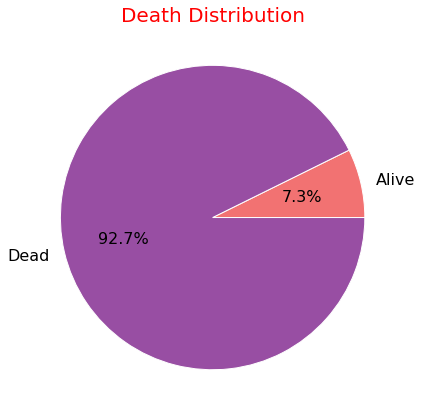

In [0]:
count_values = DF.groupby('DIED_COL').count().collect()
count_alive = count_values[0][1]
count_dead = count_values[1][1]

# Create the pie chart
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(
    [count_alive, count_dead], labels=['Alive', 'Dead'], autopct='%1.1f%%',
    startangle=0, textprops={'fontsize': 16}, wedgeprops={'edgecolor': '#fff'}, colors=['#F27272', '#984EA3']
)
ax.set_title('Death Distribution', fontsize=20, color='red')

# Display the chart
plt.show()

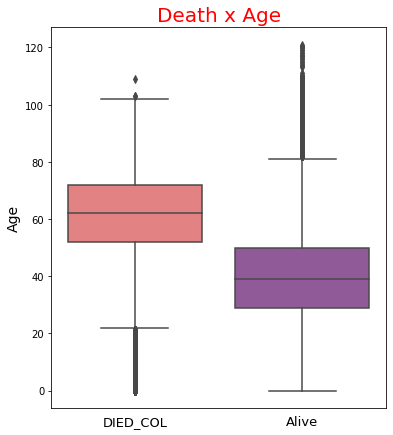

In [0]:
plt.figure(figsize=(6, 7))
sns.boxplot(data=DF.toPandas(), x='DIED_COL', y='AGE', palette=sns.color_palette(['#F27272', '#984EA3']))
plt.title('Death x Age', color='red', fontsize=20)
plt.xlabel(None)
plt.ylabel('Age', fontsize=14)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['DIED_COL', 'Alive'], fontsize=13)

# Display the plot
plt.show()

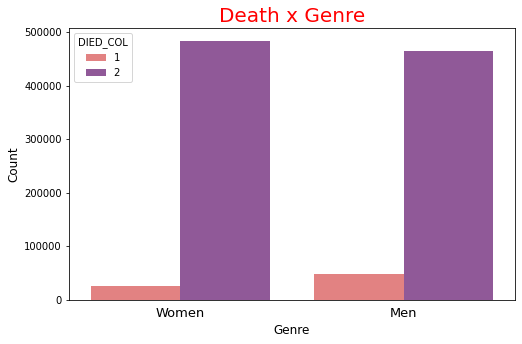

In [0]:
# Create the count plot with hue
plt.figure(figsize=(8, 5))
sns.countplot(data=DF.toPandas(), x='SEX', hue='DIED_COL', palette=sns.color_palette(['#F27272', '#984EA3']))
plt.title('Death x Genre', fontsize=20, color='r')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Women', 'Men'], fontsize=13)

# Display the plot
plt.show()

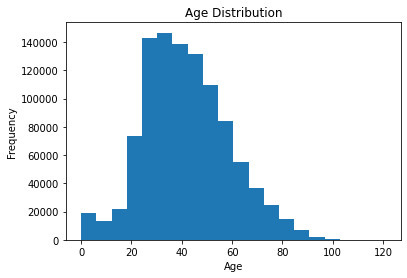

In [0]:
# Create the histogram
plt.hist(DF.select('AGE').toPandas()['AGE'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Display the plot
plt.show()

## In medical research and clinical practice, comorbidity is an important consideration because it can affect the diagnosis, treatment, and prognosis of a patient. Comorbidities can be either pre-existing conditions or new conditions that arise as a result of the primary disease or disorder.

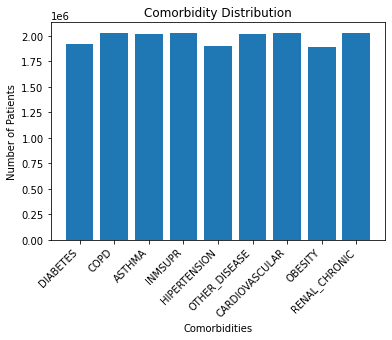

In [0]:
# Import necessary libraries
import matplotlib.pyplot as plt
from pyspark.sql.functions import sum

# Define comorbidities and calculate counts
comorbidities = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC']
comorbidity_counts = [DF.select(sum(col(comorbidity)).alias(comorbidity)).collect()[0][comorbidity] for comorbidity in comorbidities]

# Create the bar plot
plt.bar(comorbidities, comorbidity_counts)
plt.xlabel('Comorbidities')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Comorbidity Distribution')

# Display the plot
plt.show()

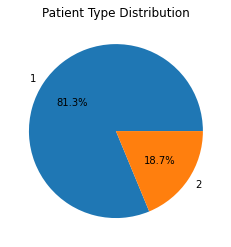

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
patient_types = DF.groupby('PATIENT_TYPE').count().toPandas()
patient_types_counts = patient_types['count']
patient_types_labels = patient_types['PATIENT_TYPE']

# Create the pie chart
plt.pie(patient_types_counts, labels=patient_types_labels, autopct='%1.1f%%')
plt.title('Patient Type Distribution')

# Display the chart
plt.show()

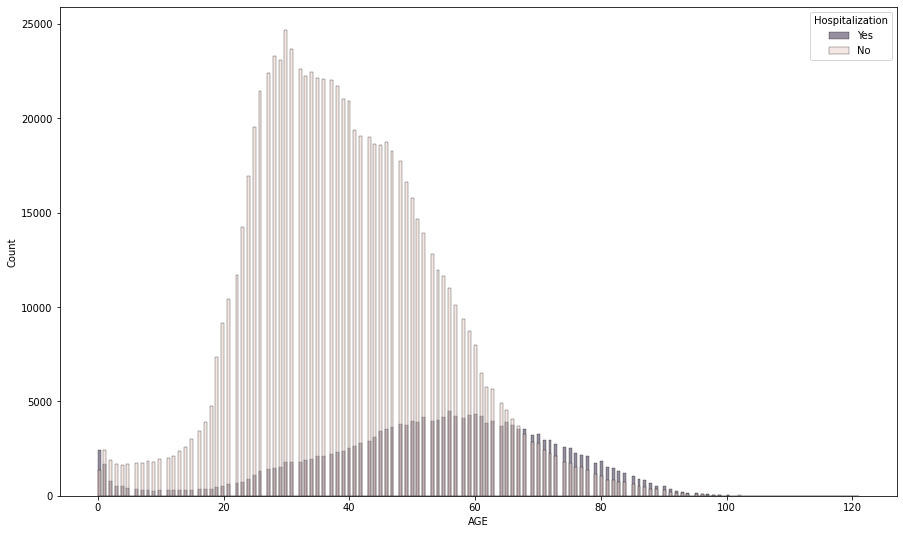

In [0]:
df_pd = DF.toPandas()

# Create the histogram with hue
plt.figure(figsize=(15, 9))
p_type = sns.histplot(data=df_pd, x='AGE', hue='PATIENT_TYPE')
plt.legend(title='Hospitalization', loc='upper right', labels=['Yes', 'No'])
plt.show(p_type)

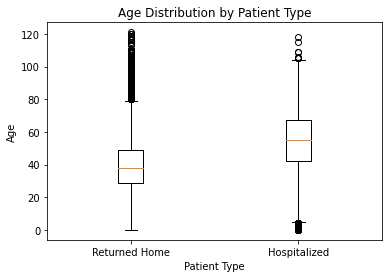

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
df_pd = DF.toPandas()

# Create the boxplot
plt.boxplot([df_pd[df_pd['PATIENT_TYPE'] == 1]['AGE'], df_pd[df_pd['PATIENT_TYPE'] == 2]['AGE']])
plt.xticks([1, 2], ['Returned Home', 'Hospitalized'])
plt.xlabel('Patient Type')
plt.ylabel('Age')
plt.title('Age Distribution by Patient Type')
plt.show()

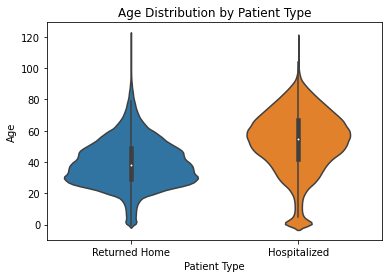

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
df_pd = DF.toPandas()

# Create the violin plot
sns.violinplot(x="PATIENT_TYPE", y="AGE", data=df_pd)
plt.xticks([0, 1], ['Returned Home', 'Hospitalized'])
plt.xlabel('Patient Type')
plt.ylabel('Age')
plt.title('Age Distribution by Patient Type')
plt.show()


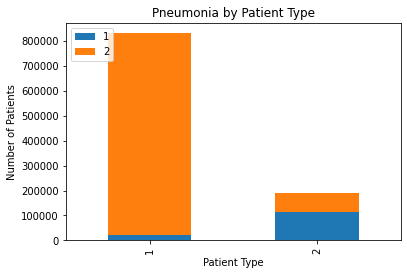

In [0]:
pneumonia_counts_by_type = df_pd.groupby(['PATIENT_TYPE', 'PNEUMONIA']).size().unstack(fill_value=0)

# Create the stacked bar chart
pneumonia_counts_by_type.plot(kind='bar', stacked=True)
plt.xlabel('Patient Type')
plt.ylabel('Number of Patients')
plt.title('Pneumonia by Patient Type')
plt.legend(loc='upper left')
plt.show()

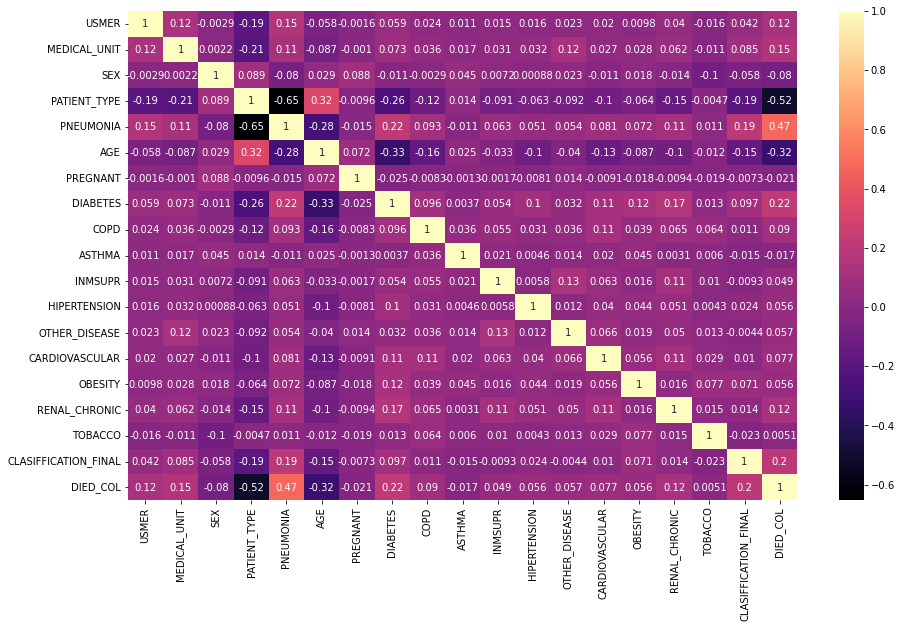

In [0]:
df_pd = DF.toPandas()

# Create the correlation heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(df_pd.corr(), annot=True, cmap='magma')
plt.show()

## Now we try to find out the 5 most influential features that cause death due to covid.

In [0]:
DF.show(10)

+-----+------------+---+------------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+--------+
|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|DIED_COL|
+-----+------------+---+------------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+--------+
|    2|           1|  1|           1|        1| 65|       2|       2|   2|     2|      2|           1|            2|             2|      2|            2|      2|                   3|       1|
|    2|           1|  2|           1|        1| 72|       2|       2|   2|     2|      2|           1|            2|             2|      1|            1|      2|                   5|       1|
|    2|           1|  2|           2|   

In [0]:
selected_features = ['AGE', 'PATIENT_TYPE', 'PNEUMONIA', 'MEDICAL_UNIT', 'HIPERTENSION']
target_col = 'DIED_COL'  # Update the target column name if needed

# Create a vector assembler to combine the selected features into a single vector column
assembler = VectorAssembler(inputCols=selected_features, outputCol='features')

# Apply the vector assembler to the DataFrame
assembled_df = assembler.transform(DF)

# Split the data into training and test sets
train_df, test_df = assembled_df.randomSplit([0.8, 0.2], seed=42)

# Create a Logistic Regression model
lr = LogisticRegression(labelCol=target_col)

# Train the model
trained_model = lr.fit(train_df)

# Make predictions on the test set
predictions = trained_model.transform(test_df)

# Evaluate the model's performance
evaluator = MulticlassClassificationEvaluator(labelCol=target_col, metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print('Accuracy:', accuracy)

# Print the classification report
predictions.select(target_col, 'prediction').show()

Accuracy: 0.9326848706174918
+--------+----------+
|DIED_COL|prediction|
+--------+----------+
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       1|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
|       2|       2.0|
+--------+----------+
only showing top 20 rows



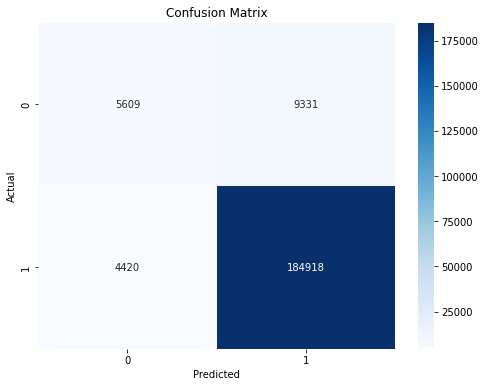

In [0]:
# Extract the true labels and predicted labels from the DataFrame
true_labels = predictions.select(target_col).rdd.flatMap(lambda x: x).collect()
predicted_labels = predictions.select('prediction').rdd.flatMap(lambda x: x).collect()

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()